In [94]:
library(ggplot2)
theme_set(
  theme_bw() +
    theme(legend.position = "top")
  )
mynamestheme <- theme(plot.title = element_text(family = "Helvetica", face = "bold", size = (15)), 
                 legend.title = element_text(colour = "steelblue",  face = "bold.italic", family = "Helvetica"), 
                 legend.text = element_text(face = "italic", colour="steelblue4",family = "Helvetica"), 
                  axis.title = element_text(family = "Helvetica", size = (10), colour = "steelblue4"),
                  axis.text = element_text(family = "Courier", colour = "cornflowerblue", size = (10)))
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [34]:
# install.packages("mice")VIM
# install.packages("VIM")

also installing the dependencies ‘matrixStats’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘DEoptimR’, ‘car’, ‘robustbase’, ‘sp’, ‘vcd’, ‘e1071’, ‘laeken’, ‘ranger’





The downloaded binary packages are in
	/var/folders/ky/kh5k78f16wg9svql__k5bs200000gn/T//RtmptOjFoQ/downloaded_packages


In [80]:
# Download R libraries for analysis
library(xts)
library(dplyr)
library(quantmod)
library(lubridate)
library(mice)
library(VIM)
library(reshape2)

In [2]:
# Read Data
house.data <- read.csv("data/train.csv", stringsAsFactors=TRUE)
str(house.data)

'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 5 4 ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley        : Factor w/ 2 levels "Grvl","Pave": NA NA NA NA NA NA NA NA NA NA ...
 $ LotShape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 1 1 1 1 4 1 4 4 ...
 $ LandContour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities    : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig    : Factor w/ 5 levels "Corner","CulDSac",..: 5 3 5 1 3 5 5 1 5 1 ...
 $ LandSlope    : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood : Factor w/ 25 levels "Blmngtn","Blueste",..:

## DATA CLEANING
* MCAR: missing completely at random. This is the desirable scenario in case of missing data.
* MNAR: missing not at random. Missing not at random data is a more serious issue and in this case it might be wise to check the data gathering process further and try to understand why the information is missing.

In [15]:
sum(is.na(house.data$LotFrontage))
which(is.na(house.data$LotFrontage))

[1] 259

[1]    8   13   15   17   25   32   43   44   51   65   67   77   85   96  101
 [16]  105  112  114  117  121  127  132  134  137  148  150  153  154  161  167
 [31]  170  171  178  181  187  192  204  208  209  215  219  222  235  238  245
 [46]  250  270  288  289  294  308  309  311  320  329  331  336  343  347  348
 [61]  352  357  361  362  365  367  370  371  376  385  393  394  405  406  413
 [76]  422  427  448  453  458  459  460  466  471  485  491  497  517  519  530
 [91]  538  539  540  542  546  560  561  565  570  581  594  611  612  613  617
[106]  624  627  642  646  661  667  669  673  680  683  686  688  691  707  710
[121]  715  721  722  727  735  746  747  752  758  771  784  786  790  792  795
[136]  812  817  818  823  829  841  846  852  854  856  857  860  866  869  880
[151]  883  894  901  905  909  912  918  926  928  929  930  940  942  945  954
[166]  962  968  976  981  984  989  997  998 1004 1007 1018 1019 1025 1031 1033
[181] 1034 1036 1038 1042 1046 1058 1060 1065 1078 1085 1087 1098 1109 1111 1117
[196] 1123 1125 1139 1142 1144 1147 1149 1154 1155 1162 1165 1178 1181 1191 1194
[211] 1207 1214 1231 1234 1245 1248 1252 1254 1261 1263 1269 1271 1272 1273 1277
[226] 1278 1287 1288 1291 1301 1302 1310 1313 1319 1322 1343 1347 1349 1355 1357
[241] 1358 1359 1363 1366 1369 1374 1382 1384 1397 1408 1418 1420 1424 1425 1430
[256] 1432 1442 1444 1447

In [28]:
# Find the number of missing values
apply(is.na(house.data), 2, sum)

Id    MSSubClass      MSZoning   LotFrontage       LotArea 
            0             0             0           259             0 
       Street         Alley      LotShape   LandContour     Utilities 
            0          1369             0             0             0 
    LotConfig     LandSlope  Neighborhood    Condition1    Condition2 
            0             0             0             0             0 
     BldgType    HouseStyle   OverallQual   OverallCond     YearBuilt 
            0             0             0             0             0 
 YearRemodAdd     RoofStyle      RoofMatl   Exterior1st   Exterior2nd 
            0             0             0             0             0 
   MasVnrType    MasVnrArea     ExterQual     ExterCond    Foundation 
            8             8             0             0             0 
     BsmtQual      BsmtCond  BsmtExposure  BsmtFinType1    BsmtFinSF1 
           37            37            38            37             0 
 BsmtFinType2    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF       Heating 
           38             0             0             0             0 
    HeatingQC    CentralAir    Electrical     X1stFlrSF     X2ndFlrSF 
            0             0             1             0             0 
 LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath 
            0             0             0             0             0 
     HalfBath  BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd 
            0             0             0             0             0 
   Functional    Fireplaces   FireplaceQu    GarageType   GarageYrBlt 
            0             0           690            81            81 
 GarageFinish    GarageCars    GarageArea    GarageQual    GarageCond 
           81             0             0            81            81 
   PavedDrive    WoodDeckSF   OpenPorchSF EnclosedPorch    X3SsnPorch 
            0             0             0             0             0 
  ScreenPorch      PoolArea        PoolQC         Fence   MiscFeature 
            0             0          1453          1179          1406 
      MiscVal        MoSold        YrSold      SaleType SaleCondition 
            0             0             0             0             0 
    SalePrice 
            0

In [27]:
# Find percentage of missing values in each column (safe maximum threshold is 5% of the total for large datasets)
# apply(is.na(house.data), 2, mean)
pMiss <- function(x){sum(is.na(x))/length(x)*100}
apply(house.data,2,pMiss)
# apply(house.data,1,pMiss)

Id    MSSubClass      MSZoning   LotFrontage       LotArea 
   0.00000000    0.00000000    0.00000000   17.73972603    0.00000000 
       Street         Alley      LotShape   LandContour     Utilities 
   0.00000000   93.76712329    0.00000000    0.00000000    0.00000000 
    LotConfig     LandSlope  Neighborhood    Condition1    Condition2 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
     BldgType    HouseStyle   OverallQual   OverallCond     YearBuilt 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
 YearRemodAdd     RoofStyle      RoofMatl   Exterior1st   Exterior2nd 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
   MasVnrType    MasVnrArea     ExterQual     ExterCond    Foundation 
   0.54794521    0.54794521    0.00000000    0.00000000    0.00000000 
     BsmtQual      BsmtCond  BsmtExposure  BsmtFinType1    BsmtFinSF1 
   2.53424658    2.53424658    2.60273973    2.53424658    0.00000000 
 BsmtFinType2    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF       Heating 
   2.60273973    0.00000000    0.00000000    0.00000000    0.00000000 
    HeatingQC    CentralAir    Electrical     X1stFlrSF     X2ndFlrSF 
   0.00000000    0.00000000    0.06849315    0.00000000    0.00000000 
 LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
     HalfBath  BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
   Functional    Fireplaces   FireplaceQu    GarageType   GarageYrBlt 
   0.00000000    0.00000000   47.26027397    5.54794521    5.54794521 
 GarageFinish    GarageCars    GarageArea    GarageQual    GarageCond 
   5.54794521    0.00000000    0.00000000    5.54794521    5.54794521 
   PavedDrive    WoodDeckSF   OpenPorchSF EnclosedPorch    X3SsnPorch 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
  ScreenPorch      PoolArea        PoolQC         Fence   MiscFeature 
   0.00000000    0.00000000   99.52054795   80.75342466   96.30136986 
      MiscVal        MoSold        YrSold      SaleType SaleCondition 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
    SalePrice 
   0.00000000

In [39]:
# List of Columns Names with Missing Values
col.missNames = names(which(sapply(house.data, anyNA)))
col.missNames

[1] "LotFrontage"  "Alley"        "MasVnrType"   "MasVnrArea"   "BsmtQual"    
 [6] "BsmtCond"     "BsmtExposure" "BsmtFinType1" "BsmtFinType2" "Electrical"  
[11] "FireplaceQu"  "GarageType"   "GarageYrBlt"  "GarageFinish" "GarageQual"  
[16] "GarageCond"   "PoolQC"       "Fence"        "MiscFeature"

In [41]:
house.dataMisssedvalues = house.data[,c(col.missNames)]
str(house.dataMisssedvalues)

'data.frame':	1460 obs. of  19 variables:
 $ LotFrontage : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ Alley       : Factor w/ 2 levels "Grvl","Pave": NA NA NA NA NA NA NA NA NA NA ...
 $ MasVnrType  : Factor w/ 4 levels "BrkCmn","BrkFace",..: 2 3 2 3 2 3 4 4 3 3 ...
 $ MasVnrArea  : int  196 0 162 0 350 0 186 240 0 0 ...
 $ BsmtQual    : Factor w/ 4 levels "Ex","Fa","Gd",..: 3 3 3 4 3 3 1 3 4 4 ...
 $ BsmtCond    : Factor w/ 4 levels "Fa","Gd","Po",..: 4 4 4 2 4 4 4 4 4 4 ...
 $ BsmtExposure: Factor w/ 4 levels "Av","Gd","Mn",..: 4 2 3 4 1 4 1 3 4 4 ...
 $ BsmtFinType1: Factor w/ 6 levels "ALQ","BLQ","GLQ",..: 3 1 3 1 3 3 3 1 6 3 ...
 $ BsmtFinType2: Factor w/ 6 levels "ALQ","BLQ","GLQ",..: 6 6 6 6 6 6 6 2 6 6 ...
 $ Electrical  : Factor w/ 5 levels "FuseA","FuseF",..: 5 5 5 5 5 5 5 5 2 5 ...
 $ FireplaceQu : Factor w/ 5 levels "Ex","Fa","Gd",..: NA 5 5 3 5 NA 3 5 5 5 ...
 $ GarageType  : Factor w/ 6 levels "2Types","Attchd",..: 2 2 2 6 2 2 2 2 6 2 ...
 $ GarageYrBlt : int  2003 1976 20

In [48]:
# md.pattern(house.dataMisssedvalues)

Warning message in plot.aggr(res, ...):
“not enough vertical space to display frequencies (too many combinations)”



 Variables sorted by number of missings: 
     Variable        Count
       PoolQC 0.9952054795
  MiscFeature 0.9630136986
        Alley 0.9376712329
        Fence 0.8075342466
  FireplaceQu 0.4726027397
  LotFrontage 0.1773972603
   GarageType 0.0554794521
  GarageYrBlt 0.0554794521
 GarageFinish 0.0554794521
   GarageQual 0.0554794521
   GarageCond 0.0554794521
 BsmtExposure 0.0260273973
 BsmtFinType2 0.0260273973
     BsmtQual 0.0253424658
     BsmtCond 0.0253424658
 BsmtFinType1 0.0253424658
   MasVnrType 0.0054794521
   MasVnrArea 0.0054794521
   Electrical 0.0006849315


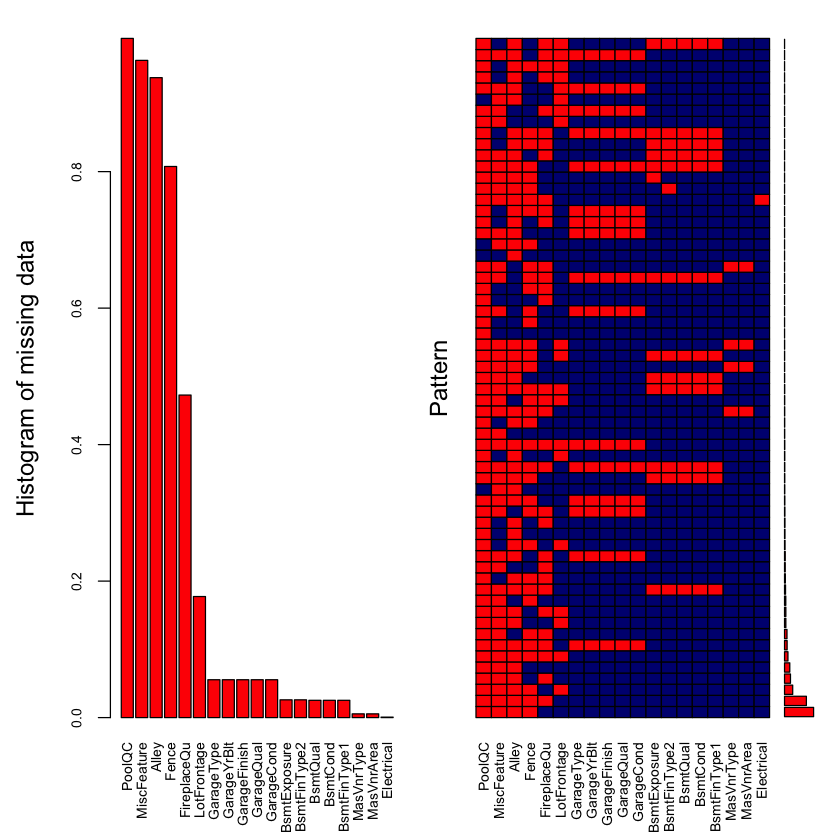

In [43]:
aggr_plot <- aggr(house.dataMisssedvalues, col=c('navyblue','red'), numbers=TRUE, sortVars=TRUE, labels=names(data), 
                  cex.axis=.7, gap=3, ylab=c("Histogram of missing data","Pattern"))

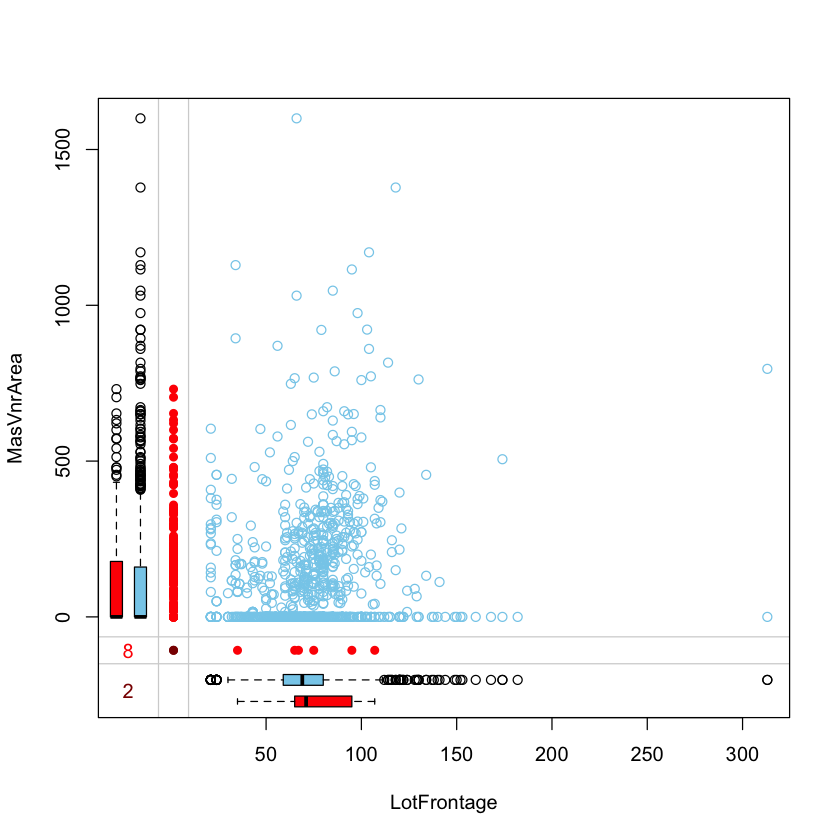

In [52]:
marginplot(house.dataMisssedvalues[c(1,4)])

In [58]:
# Imputing missing values
# tempData <- mice(house.dataMisssedvalues,m=5,maxit=50,meth='pmm',seed=500)
# summary(tempData)

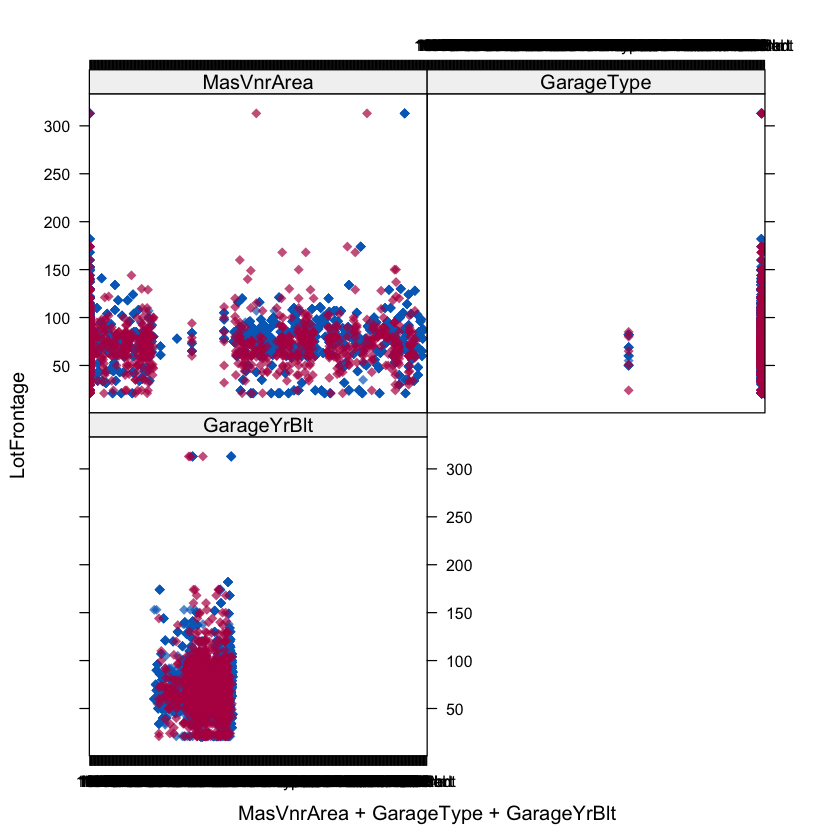

In [54]:
xyplot(tempData,LotFrontage ~ MasVnrArea+GarageType+GarageYrBlt,pch=18,cex=1)

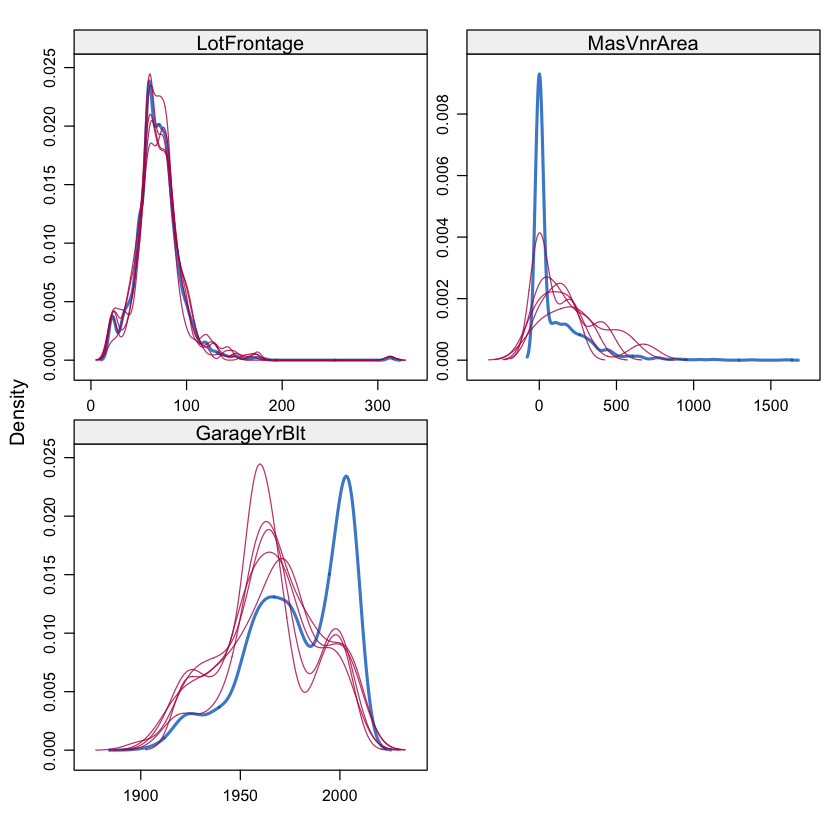

In [55]:
densityplot(tempData)

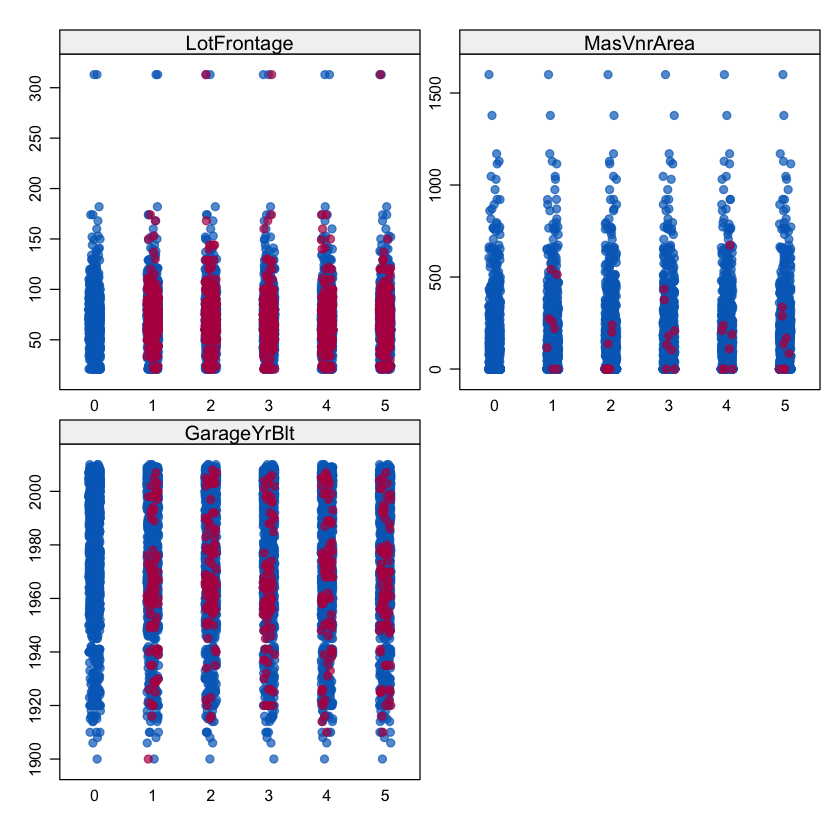

In [56]:
stripplot(tempData, pch = 20, cex = 1.2)

In [86]:
# Create Clean Data Frame without Columns with Missing Values
house.dataClean <- house.data[, setdiff(names(house.data), c(col.missNames, 'Id', 'Utilities'))]
str(house.dataClean)

'data.frame':	1460 obs. of  60 variables:
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 5 4 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ LotShape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 1 1 1 1 4 1 4 4 ...
 $ LandContour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ LotConfig    : Factor w/ 5 levels "Corner","CulDSac",..: 5 3 5 1 3 5 5 1 5 1 ...
 $ LandSlope    : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood : Factor w/ 25 levels "Blmngtn","Blueste",..: 6 25 6 7 14 12 21 17 18 4 ...
 $ Condition1   : Factor w/ 9 levels "Artery","Feedr",..: 3 2 3 3 3 3 3 5 1 1 ...
 $ Condition2   : Factor w/ 8 levels "Artery","Feedr",..: 3 3 3 3 3 3 3 3 3 1 ...
 $ BldgType     : Factor w/ 5 levels "1Fam","2fmCon",..: 1 1 1 1 1 1 1 1 1 2

* Correlation Matrix

In [87]:
# Selecting only numeric columns from a data frame
house.dataNumeric <- select_if(house.dataClean, is.numeric)

In [117]:
cormat <- round(cor(house.dataNumeric),2)
head(cormat)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,⋯,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.14,0.03,-0.06,0.03,0.04,-0.07,-0.07,-0.14,-0.24,⋯,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
LotArea,-0.14,1.00,0.11,-0.01,0.01,0.01,0.21,0.11,0.00,0.26,⋯,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26
OverallQual,0.03,0.11,1.00,-0.09,0.57,0.55,0.24,-0.06,0.31,0.54,⋯,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79
OverallCond,-0.06,-0.01,-0.09,1.00,-0.38,0.07,-0.05,0.04,-0.14,-0.17,⋯,0.00,-0.03,0.07,0.03,0.05,0.00,0.07,0.00,0.04,-0.08
YearBuilt,0.03,0.01,0.57,-0.38,1.00,0.59,0.25,-0.05,0.15,0.39,⋯,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52
YearRemodAdd,0.04,0.01,0.55,0.07,0.59,1.00,0.13,-0.07,0.18,0.29,⋯,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51


In [122]:
# cormat <- cormat %>% slice(1:12)
melted_cormat <- melt(cormat)
melted_cormat <- melted_cormat %>% slice(1:12)
str(melted_cormat)

'data.frame':	12 obs. of  3 variables:
 $ Var1 : Factor w/ 34 levels "MSSubClass","LotArea",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Var2 : Factor w/ 34 levels "MSSubClass","LotArea",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ value: num  1 -0.14 0.03 -0.06 0.03 0.04 -0.07 -0.07 -0.14 -0.24 ...


In [123]:
# Get lower triangle of the correlation matrix
  get_lower_tri<-function(cormat){
    cormat[upper.tri(cormat)] <- NA
    return(cormat)
  }
  # Get upper triangle of the correlation matrix
  get_upper_tri <- function(cormat){
    cormat[lower.tri(cormat)]<- NA
    return(cormat)
  }
upper_tri <- get_upper_tri(cormat)
# Melt the correlation matrix
melted_cormat <- melt(upper_tri, na.rm = TRUE)

In [124]:
reorder_cormat <- function(cormat){
# Use correlation between variables as distance
dd <- as.dist((1-cormat)/2)
hc <- hclust(dd)
cormat <-cormat[hc$order, hc$order]
}
# Reorder the correlation matrix
cormat <- reorder_cormat(cormat)
upper_tri <- get_upper_tri(cormat)
# Melt the correlation matrix
melted_cormat <- melt(upper_tri, na.rm = TRUE)

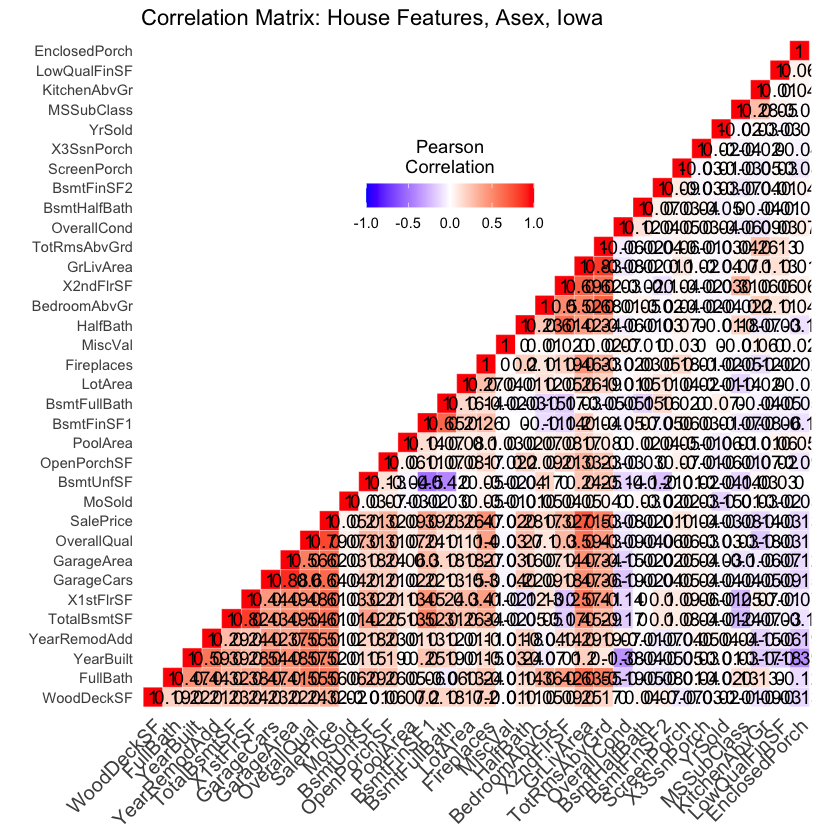

In [125]:
# Create a ggheatmap
ggheatmap <- ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
    name="Pearson\nCorrelation") +
  theme_minimal()+ # minimal theme
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()
ggheatmap + 
geom_text(aes(Var2, Var1, label = value), color = "black", size = 4) +
theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.grid.major = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  axis.ticks = element_blank(),
  legend.justification = c(1, 0),
  legend.position = c(0.6, 0.7),
  legend.direction = "horizontal")+
  guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                title.position = "top", title.hjust = 0.5))+ ggtitle("Correlation Matrix: House Features, Asex, Iowa")

* Selection Model

In [72]:
# Split data: training set - 80%, test set - 20%
set.seed(2)
housedata.samples <- sample.int(nrow(house.dataClean), 0.8*nrow(house.dataClean))
train <- house.dataClean[housedata.samples,]
test <- house.dataClean[-housedata.samples,]
n <- nrow(train)

In [73]:
apply(is.na(train), 2, sum)

Id    MSSubClass      MSZoning       LotArea        Street 
            0             0             0             0             0 
     LotShape   LandContour     LotConfig     LandSlope  Neighborhood 
            0             0             0             0             0 
   Condition1    Condition2      BldgType    HouseStyle   OverallQual 
            0             0             0             0             0 
  OverallCond     YearBuilt  YearRemodAdd     RoofStyle      RoofMatl 
            0             0             0             0             0 
  Exterior1st   Exterior2nd     ExterQual     ExterCond    Foundation 
            0             0             0             0             0 
   BsmtFinSF1    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF       Heating 
            0             0             0             0             0 
    HeatingQC    CentralAir     X1stFlrSF     X2ndFlrSF  LowQualFinSF 
            0             0             0             0             0 
    GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath      HalfBath 
            0             0             0             0             0 
 BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd    Functional 
            0             0             0             0             0 
   Fireplaces    GarageCars    GarageArea    PavedDrive    WoodDeckSF 
            0             0             0             0             0 
  OpenPorchSF EnclosedPorch    X3SsnPorch   ScreenPorch      PoolArea 
            0             0             0             0             0 
      MiscVal        MoSold        YrSold      SaleType SaleCondition 
            0             0             0             0             0 
    SalePrice 
            0

In [74]:
debug_contr_error <- function (dat, subset_vec = NULL) {
  if (!is.null(subset_vec)) {
    ## step 0
    if (mode(subset_vec) == "logical") {
      if (length(subset_vec) != nrow(dat)) {
        stop("'logical' `subset_vec` provided but length does not match `nrow(dat)`")
        }
      subset_log_vec <- subset_vec
      } else if (mode(subset_vec) == "numeric") {
      ## check range
      ran <- range(subset_vec)
      if (ran[1] < 1 || ran[2] > nrow(dat)) {
        stop("'numeric' `subset_vec` provided but values are out of bound")
        } else {
        subset_log_vec <- logical(nrow(dat))
        subset_log_vec[as.integer(subset_vec)] <- TRUE
        } 
      } else {
      stop("`subset_vec` must be either 'logical' or 'numeric'")
      }
    dat <- base::subset(dat, subset = subset_log_vec)
    } else {
    ## step 1
    dat <- stats::na.omit(dat)
    }
  if (nrow(dat) == 0L) warning("no complete cases")
    ## step 2
  var_mode <- sapply(dat, mode)
  if (any(var_mode %in% c("complex", "raw"))) stop("complex or raw not allowed!")
  var_class <- sapply(dat, class)
  if (any(var_mode[var_class == "AsIs"] %in% c("logical", "character"))) {
    stop("matrix variables with 'AsIs' class must be 'numeric'")
    }
  ind1 <- which(var_mode %in% c("logical", "character"))
  dat[ind1] <- lapply(dat[ind1], as.factor)
  ## step 3
  fctr <- which(sapply(dat, is.factor))
  if (length(fctr) == 0L) warning("no factor variables to summary")
  ind2 <- if (length(ind1) > 0L) fctr[-ind1] else fctr
  dat[ind2] <- lapply(dat[ind2], base::droplevels.factor)
  ## step 4
  lev <- lapply(dat[fctr], base::levels.default)
  nl <- lengths(lev)
  ## return
  list(nlevels = nl, levels = lev)
  }

In [75]:
debug_contr_error(train)

$nlevels
     MSZoning        Street      LotShape   LandContour     LotConfig 
            5             2             4             4             5 
    LandSlope  Neighborhood    Condition1    Condition2      BldgType 
            3            25             9             8             5 
   HouseStyle     RoofStyle      RoofMatl   Exterior1st   Exterior2nd 
            8             6             7            14            16 
    ExterQual     ExterCond    Foundation       Heating     HeatingQC 
            4             5             6             6             5 
   CentralAir   KitchenQual    Functional    PavedDrive      SaleType 
            2             4             6             3             9 
SaleCondition 
            6 

$levels
$levels$MSZoning
[1] "C (all)" "FV"      "RH"      "RL"      "RM"     

$levels$Street
[1] "Grvl" "Pave"

$levels$LotShape
[1] "IR1" "IR2" "IR3" "Reg"

$levels$LandContour
[1] "Bnk" "HLS" "Low" "Lvl"

$levels$LotConfig
[1] "Corner"  "CulDSac" "FR2"     "FR3"     "Inside" 

$levels$LandSlope
[1] "Gtl" "Mod" "Sev"

$levels$Neighborhood
 [1] "Blmngtn" "Blueste" "BrDale"  "BrkSide" "ClearCr" "CollgCr" "Crawfor"
 [8] "Edwards" "Gilbert" "IDOTRR"  "MeadowV" "Mitchel" "NAmes"   "NoRidge"
[15] "NPkVill" "NridgHt" "NWAmes"  "OldTown" "Sawyer"  "SawyerW" "Somerst"
[22] "StoneBr" "SWISU"   "Timber"  "Veenker"

$levels$Condition1
[1] "Artery" "Feedr"  "Norm"   "PosA"   "PosN"   "RRAe"   "RRAn"   "RRNe"  
[9] "RRNn"  

$levels$Condition2
[1] "Artery" "Feedr"  "Norm"   "PosA"   "PosN"   "RRAe"   "RRAn"   "RRNn"  

$levels$BldgType
[1] "1Fam"   "2fmCon" "Duplex" "Twnhs"  "TwnhsE"

$levels$HouseStyle
[1] "1.5Fin" "1.5Unf" "1Story" "2.5Fin" "2.5Unf" "2Story" "SFoyer" "SLvl"  

$levels$RoofStyle
[1] "Flat"    "Gable"   "Gambrel" "Hip"     "Mansard" "Shed"   

$levels$RoofMatl
[1] "ClyTile" "CompShg" "Membran" "Metal"   "Tar&Grv" "WdShake" "WdShngl"

$levels$Exterior1st
 [1] "AsbShng" "AsphShn" "BrkFace" "CBlock"  "CemntBd" "HdBoard" "ImStucc"
 [8] "MetalSd" "Plywood" "Stone"   "Stucco"  "VinylSd" "Wd Sdng" "WdShing"

$levels$Exterior2nd
 [1] "AsbShng" "AsphShn" "Brk Cmn" "BrkFace" "CBlock"  "CmentBd" "HdBoard"
 [8] "ImStucc" "MetalSd" "Other"   "Plywood" "Stone"   "Stucco"  "VinylSd"
[15] "Wd Sdng" "Wd Shng"

$levels$ExterQual
[1] "Ex" "Fa" "Gd" "TA"

$levels$ExterCond
[1] "Ex" "Fa" "Gd" "Po" "TA"

$levels$Foundation
[1] "BrkTil" "CBlock" "PConc"  "Slab"   "Stone"  "Wood"  

$levels$Heating
[1] "Floor" "GasA"  "GasW"  "Grav"  "OthW"  "Wall" 

$levels$HeatingQC
[1] "Ex" "Fa" "Gd" "Po" "TA"

$levels$CentralAir
[1] "N" "Y"

$levels$KitchenQual
[1] "Ex" "Fa" "Gd" "TA"

$levels$Functional
[1] "Maj1" "Maj2" "Min1" "Min2" "Mod"  "Typ" 

$levels$PavedDrive
[1] "N" "P" "Y"

$levels$SaleType
[1] "COD"   "Con"   "ConLD" "ConLI" "ConLw" "CWD"   "New"   "Oth"   "WD"   

$levels$SaleCondition
[1] "Abnorml" "AdjLand" "Alloca"  "Family"  "Normal"  "Partial"

In [76]:
# Build a model without interactions
base.house.rate <- lm(log(SalePrice) ~ 1, data=train)
full.house.rate <- lm(log(SalePrice) ~ ., data=train)

In [77]:
# Forward Stepwise Regression
fwdBIC <- step(base.house.rate, scope=formula(full.house.rate),
direction="forward", k=log(n))
summary(fwdBIC)

Start:  AIC=-2227.17
log(SalePrice) ~ 1

                Df Sum of Sq     RSS     AIC
+ OverallQual    1   115.822  56.639 -3520.6
+ Neighborhood  24    96.724  75.738 -3018.8
+ ExterQual      3    81.887  90.575 -2958.2
+ GrLivArea      1    78.645  93.817 -2931.2
+ GarageCars     1    77.413  95.048 -2916.0
+ KitchenQual    3    76.490  95.972 -2890.6
+ GarageArea     1    69.268 103.193 -2820.0
+ TotalBsmtSF    1    62.033 110.429 -2740.8
+ FullBath       1    60.399 112.063 -2723.6
+ YearBuilt      1    58.730 113.732 -2706.4
+ X1stFlrSF      1    58.663 113.799 -2705.7
+ YearRemodAdd   1    55.732 116.730 -2676.0
+ Foundation     5    50.270 122.192 -2594.3
+ TotRmsAbvGrd   1    43.394 129.068 -2558.6
+ Fireplaces     1    38.161 134.301 -2512.2
+ HeatingQC      4    37.472 134.989 -2485.1
+ MSZoning       4    25.985 146.477 -2389.7
+ BsmtFinSF1     1    22.185 150.277 -2380.9
+ Exterior1st   13    31.315 141.147 -2369.4
+ OpenPorchSF    1    20.110 152.352 -2364.9
+ SaleConditio


Call:
lm(formula = log(SalePrice) ~ OverallQual + GrLivArea + Neighborhood + 
    GarageCars + OverallCond + BsmtFullBath + RoofMatl + TotalBsmtSF + 
    YearBuilt + BldgType + Condition2 + BsmtFinSF1 + Fireplaces + 
    SaleCondition + LotArea + CentralAir + MSZoning + ScreenPorch + 
    WoodDeckSF + Functional + KitchenQual + LandSlope + EnclosedPorch, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74168 -0.05312  0.00052  0.05597  0.74168 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.777e+00  5.704e-01   3.115 0.001888 ** 
OverallQual           5.189e-02  4.619e-03  11.232  < 2e-16 ***
GrLivArea             2.608e-04  1.006e-05  25.926  < 2e-16 ***
NeighborhoodBlueste  -7.048e-02  8.440e-02  -0.835 0.403869    
NeighborhoodBrDale   -7.055e-02  5.248e-02  -1.344 0.179147    
NeighborhoodBrkSide  -3.487e-02  4.299e-02  -0.811 0.417480    
NeighborhoodClearCr   1.943e-02  4.396e-02   0.442 0.658

In [101]:
BIC.base = extractAIC(fwdBIC, k=log(n))[2]
signif(BIC.base, digits=6)

[1] -4775.77

In [100]:
# Build a model with all posible interactions
full_interact.house.rate <- lm(log(SalePrice) ~ . + .^2, data=train)

In [102]:
# Forward Stepwise Regression
fwdBIC.interact <- step(base.house.rate, scope=formula(full_interact.house.rate),
direction="forward", k=log(n))
summary(fwdBIC)

Start:  AIC=-2227.17
log(SalePrice) ~ 1

                Df Sum of Sq     RSS     AIC
+ OverallQual    1   115.822  56.639 -3520.6
+ Neighborhood  24    96.724  75.738 -3018.8
+ ExterQual      3    81.887  90.575 -2958.2
+ GrLivArea      1    78.645  93.817 -2931.2
+ GarageCars     1    77.413  95.048 -2916.0
+ KitchenQual    3    76.490  95.972 -2890.6
+ GarageArea     1    69.268 103.193 -2820.0
+ TotalBsmtSF    1    62.033 110.429 -2740.8
+ FullBath       1    60.399 112.063 -2723.6
+ YearBuilt      1    58.730 113.732 -2706.4
+ X1stFlrSF      1    58.663 113.799 -2705.7
+ YearRemodAdd   1    55.732 116.730 -2676.0
+ Foundation     5    50.270 122.192 -2594.3
+ TotRmsAbvGrd   1    43.394 129.068 -2558.6
+ Fireplaces     1    38.161 134.301 -2512.2
+ HeatingQC      4    37.472 134.989 -2485.1
+ MSZoning       4    25.985 146.477 -2389.7
+ BsmtFinSF1     1    22.185 150.277 -2380.9
+ Exterior1st   13    31.315 141.147 -2369.4
+ OpenPorchSF    1    20.110 152.352 -2364.9
+ SaleConditio


Call:
lm(formula = log(SalePrice) ~ OverallQual + GrLivArea + Neighborhood + 
    GarageCars + OverallCond + BsmtFullBath + RoofMatl + TotalBsmtSF + 
    YearBuilt + BldgType + Condition2 + BsmtFinSF1 + Fireplaces + 
    SaleCondition + LotArea + CentralAir + MSZoning + ScreenPorch + 
    WoodDeckSF + Functional + KitchenQual + LandSlope + EnclosedPorch, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74168 -0.05312  0.00052  0.05597  0.74168 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.777e+00  5.704e-01   3.115 0.001888 ** 
OverallQual           5.189e-02  4.619e-03  11.232  < 2e-16 ***
GrLivArea             2.608e-04  1.006e-05  25.926  < 2e-16 ***
NeighborhoodBlueste  -7.048e-02  8.440e-02  -0.835 0.403869    
NeighborhoodBrDale   -7.055e-02  5.248e-02  -1.344 0.179147    
NeighborhoodBrkSide  -3.487e-02  4.299e-02  -0.811 0.417480    
NeighborhoodClearCr   1.943e-02  4.396e-02   0.442 0.658

In [106]:
BIC.interact = extractAIC(fwdBIC.interact, k=log(n))[2]
signif(BIC.interact, digits=6)

[1] -4932.46

In [107]:
## Comparing the results
BIC.merge <- c(BIC.base, BIC.interact)
signif(BIC.merge, digits=6)
## Model probabilities
eBIC <- exp(-0.5*(BIC_merge-min(BIC_merge)))
round(probs <- eBIC/sum(eBIC), 5)

[1] -4775.77 -4932.46

[1] 0 1